In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
edge_df = pd.read_csv("EdgeTableUnion.csv")
df_metadata = pd.read_csv("MetaData.csv")

C:\Users\rakes\AppData\Local\Temp\ipykernel_6380\3735439210.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_metadata = pd.read_csv("MetaData.csv")


In [5]:
e = "NCAPG"
s = "CKS1B"
edge_df[(edge_df["start_gene_name"] == s) & (edge_df["end_gene_name"] == e)]

,Unnamed: 0,interaction,name,selected,shared interaction,shared name,stringdb::coexpression,stringdb::cooccurrence,stringdb::databases,stringdb::experiments,stringdb::fusion,stringdb::interspecies,stringdb::neighborhood,stringdb::score,stringdb::textmining,start_gene_name,end_gene_name,start_gene_id,end_gene_id


In [6]:
s_gene = set(edge_df["start_gene_id"].values) 
e_gene = set(edge_df["end_gene_id"].values)

set_list = list(s_gene.union(e_gene))

In [7]:
for i in set_list:
    print(i)

201755_at
205235_s_at
205339_at
201710_at
204510_at
228033_at
1557595_at
213007_at
219306_at
212020_s_at
201890_at
209680_s_at
218726_at
220295_x_at
235709_at
204267_x_at
218755_at
1552619_a_at
217640_x_at
203086_at
219588_s_at
220060_s_at
218875_s_at
209832_s_at
205085_at
201555_at
201088_at
201291_s_at
204767_s_at
221520_s_at
204826_at
226980_at
204162_at
204170_s_at
1553655_at
204822_at
228069_at
225300_at
203145_at
201663_s_at
222077_s_at
227165_at
204240_s_at
226661_at
222848_at
nan
219544_at
1568596_a_at
204641_at
1554768_a_at
218009_s_at
206102_at
223229_at
216646_at
203418_at
204126_s_at
219555_s_at
223381_at
1554696_s_at
214557_at
1555772_a_at
1555046_at
204492_at
218350_s_at
204026_s_at
225655_at
210052_s_at
219502_at
205167_s_at
205023_at
223700_at
218662_s_at
205046_at
220997_s_at
209464_at
219787_s_at
202094_at
219769_at
203764_at
202240_at
203554_x_at
206500_s_at
204727_at
206316_s_at
219493_at
210821_x_at
218115_at
1554264_at
230021_at
201774_s_at
218782_s_at
204531_s_at

In [8]:
set_list =  [x for x in set_list if str(x) != 'nan']

In [9]:
num_lst = [i for i in range(0,len(set_list))]

data = {
  "Number": num_lst,
  "Gene_id": set_list
}

gene_mapped_df= pd.DataFrame(data)

print(gene_mapped_df.shape) 



(167, 2)


In [10]:
gene_mapped_df

,Number,Gene_id
0,0,201755_at
1,1,205235_s_at
2,2,205339_at
3,3,201710_at
4,4,204510_at
...,...,...
162,162,1554408_a_at
163,163,207331_at
164,164,219105_x_at
165,165,204444_at


In [11]:
gene_mapper_dict = {}
gene_mapper_dict_rev = {}
for j in range (0,len(num_lst)):
    gene_mapper_dict[j] = set_list[j]
    gene_mapper_dict_rev[set_list[j]] = j

In [12]:
node_df = pd.read_csv("df_merged.csv")

In [13]:
node_df.head()

,Unnamed: 0,SampleId,Target,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,0,GSM1045191,Normal,5.640239,5.074866,4.191770,3.574706,2.312812,5.474018,7.392011,...,13.900585,13.491092,14.891877,14.749976,10.053204,5.152432,7.779721,2.312812,2.312812,2.312812
1,1,GSM1045192,Normal,3.557696,4.984593,4.269061,4.065623,2.409371,5.246784,6.061380,...,14.694493,14.482319,15.177010,15.107731,14.600338,10.401430,13.137754,2.312812,2.560414,2.312812
2,2,GSM1045193,Normal,3.132007,5.109481,4.131843,3.574706,2.312812,6.460169,5.862504,...,14.528211,14.321748,15.195278,15.129354,14.114741,10.409900,13.120571,2.312812,2.460930,2.312812
3,3,GSM1045194,Normal,6.865108,5.473609,3.616546,3.574706,2.312812,5.146087,5.954431,...,14.891396,14.796693,15.357952,15.360100,12.696520,7.505545,10.674244,2.312812,2.312812,2.312812
4,4,GSM1045195,Normal,4.955184,5.348400,4.296657,3.799293,2.349630,5.823408,7.679896,...,14.307755,13.950866,15.133403,15.021234,10.747295,5.964108,8.416851,2.312812,2.312812,2.312812


In [14]:
node_df["Target"].value_counts()

Target
Cancer    320
Normal    170
CIN        76
Name: count, dtype: int64

In [15]:
node_df_num = node_df.loc[: , set_list]

In [16]:
node_df_num.head()

,201755_at,205235_s_at,205339_at,201710_at,204510_at,228033_at,1557595_at,213007_at,219306_at,212020_s_at,...,219918_s_at,221258_s_at,205393_s_at,225687_at,207746_at,1554408_a_at,207331_at,219105_x_at,204444_at,224428_s_at
0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.734681,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734
1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,4.214540,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261
2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,6.568763,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958
3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,3.583880,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261
4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.435110,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911


In [17]:
node_df_num.rename(columns = gene_mapper_dict_rev , inplace = True)

In [19]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.734681,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734
1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,4.214540,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261
2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,6.568763,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958
3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,3.583880,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261
4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.435110,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-0.113800,-0.001200,-0.412700,-0.068000,-0.582600,-0.271800,1.092300,-1.044400,-0.812700,-0.136200,...,-2.965200,-1.161800,-2.746700,-0.759100,-0.829800,-0.389900,2.516000,-0.004100,-0.704600,-2.833000
562,1.271600,2.439300,2.614000,4.114200,0.745100,4.405100,-2.348000,2.403800,2.318200,2.131600,...,5.417900,2.948800,3.315200,3.020400,2.602900,3.413800,2.399600,2.409900,3.579300,3.920200
563,-0.488500,-0.456800,-0.877100,0.293000,-0.910800,0.225900,0.679700,-0.988900,-0.418400,-0.591600,...,-3.013000,-1.303600,-3.818900,-0.455400,-3.285100,0.012900,-0.705500,0.004100,-3.326000,-0.934200
564,-0.823500,1.369300,0.522300,0.204200,0.351200,0.748200,-1.219300,0.420000,0.084400,1.289300,...,2.920300,1.107800,1.129200,0.451900,1.298600,1.487800,1.422700,1.169000,2.115900,1.616300


In [20]:
node_df_num["Target"] = node_df["Target"]

In [21]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,Normal
1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,Normal
2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,Normal
3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,Normal
4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-0.113800,-0.001200,-0.412700,-0.068000,-0.582600,-0.271800,1.092300,-1.044400,-0.812700,-0.136200,...,-1.161800,-2.746700,-0.759100,-0.829800,-0.389900,2.516000,-0.004100,-0.704600,-2.833000,Normal
562,1.271600,2.439300,2.614000,4.114200,0.745100,4.405100,-2.348000,2.403800,2.318200,2.131600,...,2.948800,3.315200,3.020400,2.602900,3.413800,2.399600,2.409900,3.579300,3.920200,Cancer
563,-0.488500,-0.456800,-0.877100,0.293000,-0.910800,0.225900,0.679700,-0.988900,-0.418400,-0.591600,...,-1.303600,-3.818900,-0.455400,-3.285100,0.012900,-0.705500,0.004100,-3.326000,-0.934200,Normal
564,-0.823500,1.369300,0.522300,0.204200,0.351200,0.748200,-1.219300,0.420000,0.084400,1.289300,...,1.107800,1.129200,0.451900,1.298600,1.487800,1.422700,1.169000,2.115900,1.616300,Cancer


In [22]:
    
def Target_label(s):
    if s=="Normal":
        return 0
    else:
        return 1

node_df_num["Target"] = node_df_num["Target"].apply(Target_label)

In [24]:

from imblearn.over_sampling import SMOTE

X = node_df_num.iloc[:, :-1].values  
y = node_df_num.iloc[:, -1].values   

smote = SMOTE(sampling_strategy='all')  
X_synthetic_smote, y_synthetic_smote = smote.fit_resample(X, y)


X_combined = np.vstack([X, X_synthetic_smote])  

y_combined = np.concatenate([y, y_synthetic_smote]) 

df_combined = pd.DataFrame(X_combined, columns=node_df_num.columns[:-1])  

df_combined['Target'] = y_combined

df_combined['synthetic'] = np.concatenate([np.zeros(X.shape[0]), np.ones(X_synthetic_smote.shape[0])])

print(df_combined.head())  


          0         1         2         3         4         5         6  \
0  3.509116  5.433348  5.374864  4.015619  2.836317  2.437904  4.466496   
1  2.857707  6.520997  4.956027  4.795047  2.444765  3.212331  5.137576   
2  4.026319  6.352979  5.833464  7.585631  5.998100  5.145297  4.918401   
3  3.507234  5.985797  5.911117  4.515514  2.729146  2.385296  4.338608   
4  3.468900  4.366865  4.524682  4.795047  2.392766  2.390673  4.338608   

          7         8         9  ...       159       160       161       162  \
0  4.356067  2.393320  2.526803  ...  2.320346  2.462247  2.312812  2.818044   
1  5.841830  2.393320  4.804020  ...  2.320346  3.380289  3.095385  3.205068   
2  8.338741  6.332570  4.442822  ...  3.022024  3.380289  5.912401  3.982275   
3  2.834343  2.397839  3.751463  ...  2.320346  3.380289  2.986733  2.817278   
4  4.309712  2.408134  2.750908  ...  2.312812  2.534838  2.312812  2.817278   

        163       164       165        166  Target  synthetic  
0  2

In [137]:

df_combined = df_combined[df_combined["synthetic"]==1]
df_combined = df_combined.drop("level_0",axis=1)



In [138]:
node_df_num["Target"].value_counts()

Target
1    396
0    170
Name: count, dtype: int64

In [139]:
len(df_combined)

792

In [140]:
df_combined["Target"].value_counts()

Target
0    396
1    396
Name: count, dtype: int64

In [141]:

print("Descriptive statistics for df_combined:")
print(df_combined.describe())

print("\nDescriptive statistics for node_df_num:")
print(node_df_num.describe())


Descriptive statistics for df_combined:
                0           1           2           3           4           5  \
count  792.000000  792.000000  792.000000  792.000000  792.000000  792.000000   
mean     3.477190    3.953055    4.348009    3.656723    3.698852    3.305318   
std      3.487921    3.617467    4.392099    3.539635    3.868962    3.900812   
min     -4.342700   -1.697700   -2.105814   -1.792354   -3.944900   -4.719800   
25%     -0.122469   -0.128315   -0.330630   -0.322700   -0.093156   -0.626723   
50%      3.530064    5.433348    5.372465    4.795047    3.581134    3.251437   
75%      6.540976    6.866700    7.534678    6.793472    6.350102    5.234140   
max     10.992232   10.932213   13.282742   10.001927   12.306661   13.185404   

                6           7           8           9  ...         159  \
count  792.000000  792.000000  792.000000  792.000000  ...  792.000000   
mean     2.701446    4.187769    2.987657    2.619859  ...    2.580689   
std     

In [136]:
df_combined

,level_0,0,1,2,3,4,5,6,7,8,...,159,160,161,162,163,164,165,166,Target,synthetic
0,0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,...,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,0,1.0
1,1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,...,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,0,1.0
2,2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,...,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,0,1.0
3,3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,...,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,0,1.0
4,4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,...,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,787,-0.657129,0.099364,-0.116224,0.176402,-0.207899,-0.884134,-0.061586,-0.127194,0.065256,...,-0.080057,-0.880944,-0.209037,-0.319855,0.005514,-0.583522,0.838863,-0.210392,0,1.0
788,788,5.932122,7.852270,9.470857,5.153713,8.349710,8.961461,2.668439,8.888399,6.681888,...,6.563484,11.145562,2.292997,5.184600,3.193596,8.828358,9.291252,10.788979,0,1.0
789,789,-0.299560,-0.470108,-1.281127,-0.805651,-0.856807,-1.265904,-0.243917,-1.768716,-1.465685,...,-0.992575,0.444531,-1.371435,-1.010328,0.274867,-0.704447,-1.446333,-3.232174,0,1.0
790,790,5.421532,6.967965,7.731045,6.001240,6.182203,6.175889,2.514053,8.092125,6.415887,...,4.635829,11.543191,2.397915,5.952413,3.192436,7.319191,8.561234,9.463310,0,1.0


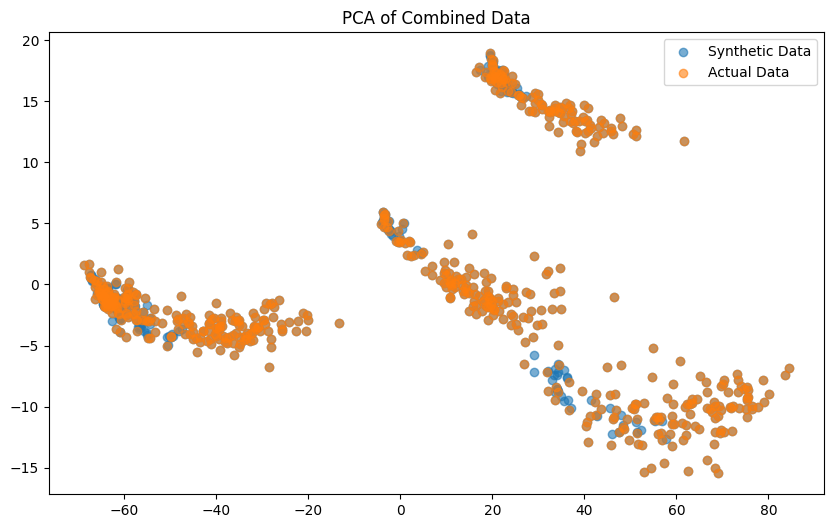

In [142]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# combining data
combined_data = np.vstack([df_combined.iloc[:, :-2].values, node_df_num.iloc[:, :-1].values])  

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)


plt.figure(figsize=(10, 6))

plt.scatter(pca_result[:df_combined.shape[0], 0], pca_result[:df_combined.shape[0], 1], label="Synthetic Data", alpha=0.6)
plt.scatter(pca_result[df_combined.shape[0]:, 0], pca_result[df_combined.shape[0]:, 1], label="Actual Data", alpha=0.6)
plt.legend()
plt.title("PCA of Combined Data")
plt.show()


In [29]:
df_combined["Target"].value_counts()

Target
0    396
1    396
Name: count, dtype: int64

In [30]:
node_df_num["Target"].value_counts()

Target
1    396
0    170
Name: count, dtype: int64

In [31]:
170/(396+170)

0.3003533568904594

In [163]:
edge_df

,Unnamed: 0,interaction,name,selected,shared interaction,shared name,stringdb::coexpression,stringdb::cooccurrence,stringdb::databases,stringdb::experiments,stringdb::fusion,stringdb::interspecies,stringdb::neighborhood,stringdb::score,stringdb::textmining,start_gene_name,end_gene_name,start_gene_id,end_gene_id
0,0,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000479617,False,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000479617,0.270,NaN,NaN,NaN,NaN,NaN,NaN,0.486,0.325,CCNE2,UHRF1,205034_at,225655_at
1,1,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000499238,False,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000499238,0.271,NaN,NaN,NaN,NaN,NaN,NaN,0.482,0.320,CCNE2,NUSAP1,205034_at,218039_at
2,2,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000481380,False,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000481380,0.379,NaN,0.4,0.176,NaN,NaN,NaN,0.866,0.618,CCNE2,CCNA2,205034_at,203418_at
3,3,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000480987,False,pp,9606.ENSP00000429089 (pp) 9606.ENSP00000480987,0.282,NaN,NaN,NaN,NaN,NaN,NaN,0.561,0.415,CCNE2,MCM3,205034_at,201555_at
4,4,pp,9606.ENSP00000376457 (pp) 9606.ENSP00000424261,False,pp,9606.ENSP00000376457 (pp) 9606.ENSP00000424261,0.261,NaN,NaN,NaN,NaN,NaN,NaN,0.437,0.271,ECT2,PTTG2,219787_s_at,214557_at
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,10773,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000377007,False,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000377007,0.426,NaN,NaN,NaN,NaN,NaN,NaN,0.426,NaN,FBXO5,CENPN,218875_s_at,219555_s_at
10774,10774,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000362146,False,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000362146,0.442,NaN,NaN,NaN,NaN,NaN,0.057,0.662,0.409,FBXO5,CDCA8,218875_s_at,221520_s_at
10775,10775,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000265148,False,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000265148,0.479,NaN,NaN,NaN,NaN,NaN,NaN,0.615,0.293,FBXO5,CENPE,218875_s_at,205046_at
10776,10776,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000378356,False,pp,9606.ENSP00000229758 (pp) 9606.ENSP00000378356,0.402,NaN,NaN,0.092,NaN,NaN,NaN,0.680,0.459,FBXO5,KIF20A,218875_s_at,218755_at


In [33]:
edge_df_num = edge_df.loc[: , ["start_gene_id","end_gene_id","stringdb::score"]]

In [34]:
edge_df_num

,start_gene_id,end_gene_id,stringdb::score
0,205034_at,225655_at,0.486
1,205034_at,218039_at,0.482
2,205034_at,203418_at,0.866
3,205034_at,201555_at,0.561
4,219787_s_at,214557_at,0.437
...,...,...,...
10773,218875_s_at,219555_s_at,0.426
10774,218875_s_at,221520_s_at,0.662
10775,218875_s_at,205046_at,0.615
10776,218875_s_at,218755_at,0.680


In [35]:
edge_df_num.rename(columns = {"start_gene_id" : "Node1","end_gene_id" : "Node2","stringdb::score" : "EdgeWeight"} , inplace = True)

In [36]:
edge_df_num = edge_df_num.dropna()

In [37]:
def edge_df_val(s):
    return gene_mapper_dict_rev[s]


edge_df_num["Node1"] = edge_df_num["Node1"].apply(edge_df_val)
edge_df_num["Node2"] = edge_df_num["Node2"].apply(edge_df_val)

C:\Users\rakes\AppData\Local\Temp\ipykernel_6380\2134091232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge_df_num["Node1"] = edge_df_num["Node1"].apply(edge_df_val)
C:\Users\rakes\AppData\Local\Temp\ipykernel_6380\2134091232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge_df_num["Node2"] = edge_df_num["Node2"].apply(edge_df_val)


In [38]:
edge_df_num

,Node1,Node2,EdgeWeight
0,120,64,0.486
1,120,108,0.482
2,120,53,0.866
3,120,25,0.561
4,74,58,0.437
...,...,...,...
10773,22,55,0.426
10774,22,29,0.662
10775,22,71,0.615
10776,22,16,0.680


In [39]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,0
1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,0
2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,0
3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,0
4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-0.113800,-0.001200,-0.412700,-0.068000,-0.582600,-0.271800,1.092300,-1.044400,-0.812700,-0.136200,...,-1.161800,-2.746700,-0.759100,-0.829800,-0.389900,2.516000,-0.004100,-0.704600,-2.833000,0
562,1.271600,2.439300,2.614000,4.114200,0.745100,4.405100,-2.348000,2.403800,2.318200,2.131600,...,2.948800,3.315200,3.020400,2.602900,3.413800,2.399600,2.409900,3.579300,3.920200,1
563,-0.488500,-0.456800,-0.877100,0.293000,-0.910800,0.225900,0.679700,-0.988900,-0.418400,-0.591600,...,-1.303600,-3.818900,-0.455400,-3.285100,0.012900,-0.705500,0.004100,-3.326000,-0.934200,0
564,-0.823500,1.369300,0.522300,0.204200,0.351200,0.748200,-1.219300,0.420000,0.084400,1.289300,...,1.107800,1.129200,0.451900,1.298600,1.487800,1.422700,1.169000,2.115900,1.616300,1


In [143]:
df_combined_only_new = df_combined.iloc[566:,:]

In [144]:

df_combined_only_new = df_combined_only_new.reset_index()

In [145]:
df_combined_only_new = df_combined_only_new.drop("index" , axis = 1)

In [146]:
df_combined_only_new

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,Target,synthetic
0,6.580437,6.477650,5.450533,6.820572,6.200273,3.992344,6.976402,5.840540,5.038931,5.175436,...,4.151729,5.615770,4.538680,6.626254,3.256380,7.765884,3.953738,5.945619,0,1.0
1,-0.822810,-0.362886,-1.364000,-1.001214,-0.396480,-0.820043,0.257443,-1.117515,-1.633563,-1.400060,...,-1.020098,-1.273833,-1.209119,-0.969302,-0.105114,-0.683683,-1.752541,-1.184495,0,1.0
2,6.432084,6.645457,5.548159,6.870902,5.230279,3.790996,7.222348,5.628760,4.607478,5.312189,...,3.736928,4.643990,4.537267,6.793352,3.555725,7.568316,3.905820,6.262291,0,1.0
3,-0.914216,-0.388703,-1.123544,-0.928264,-0.510016,-0.812986,0.142952,-1.490639,-1.586297,-0.672666,...,-0.997043,-0.364295,-1.139951,-1.324014,-0.323818,-1.058059,-1.480535,-2.012028,0,1.0
4,6.272645,7.564252,9.635293,5.292799,7.450209,5.068595,2.859167,8.485444,4.377867,4.475494,...,5.599307,5.989730,2.433615,5.818433,3.934718,9.783533,5.924269,8.298340,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.657129,0.099364,-0.116224,0.176402,-0.207899,-0.884134,-0.061586,-0.127194,0.065256,0.052619,...,-0.080057,-0.880944,-0.209037,-0.319855,0.005514,-0.583522,0.838863,-0.210392,0,1.0
222,5.932122,7.852270,9.470857,5.153713,8.349710,8.961461,2.668439,8.888399,6.681888,3.600190,...,6.563484,11.145562,2.292997,5.184600,3.193596,8.828358,9.291252,10.788979,0,1.0
223,-0.299560,-0.470108,-1.281127,-0.805651,-0.856807,-1.265904,-0.243917,-1.768716,-1.465685,-1.059621,...,-0.992575,0.444531,-1.371435,-1.010328,0.274867,-0.704447,-1.446333,-3.232174,0,1.0
224,5.421532,6.967965,7.731045,6.001240,6.182203,6.175889,2.514053,8.092125,6.415887,3.039672,...,4.635829,11.543191,2.397915,5.952413,3.192436,7.319191,8.561234,9.463310,0,1.0


In [44]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,0
1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,0
2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,0
3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,0
4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-0.113800,-0.001200,-0.412700,-0.068000,-0.582600,-0.271800,1.092300,-1.044400,-0.812700,-0.136200,...,-1.161800,-2.746700,-0.759100,-0.829800,-0.389900,2.516000,-0.004100,-0.704600,-2.833000,0
562,1.271600,2.439300,2.614000,4.114200,0.745100,4.405100,-2.348000,2.403800,2.318200,2.131600,...,2.948800,3.315200,3.020400,2.602900,3.413800,2.399600,2.409900,3.579300,3.920200,1
563,-0.488500,-0.456800,-0.877100,0.293000,-0.910800,0.225900,0.679700,-0.988900,-0.418400,-0.591600,...,-1.303600,-3.818900,-0.455400,-3.285100,0.012900,-0.705500,0.004100,-3.326000,-0.934200,0
564,-0.823500,1.369300,0.522300,0.204200,0.351200,0.748200,-1.219300,0.420000,0.084400,1.289300,...,1.107800,1.129200,0.451900,1.298600,1.487800,1.422700,1.169000,2.115900,1.616300,1


In [45]:
df_combined_only_new

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,Target,synthetic
0,6.580437,6.477650,5.450533,6.820572,6.200273,3.992344,6.976402,5.840540,5.038931,5.175436,...,4.151729,5.615770,4.538680,6.626254,3.256380,7.765884,3.953738,5.945619,0,1.0
1,-0.822810,-0.362886,-1.364000,-1.001214,-0.396480,-0.820043,0.257443,-1.117515,-1.633563,-1.400060,...,-1.020098,-1.273833,-1.209119,-0.969302,-0.105114,-0.683683,-1.752541,-1.184495,0,1.0
2,6.432084,6.645457,5.548159,6.870902,5.230279,3.790996,7.222348,5.628760,4.607478,5.312189,...,3.736928,4.643990,4.537267,6.793352,3.555725,7.568316,3.905820,6.262291,0,1.0
3,-0.914216,-0.388703,-1.123544,-0.928264,-0.510016,-0.812986,0.142952,-1.490639,-1.586297,-0.672666,...,-0.997043,-0.364295,-1.139951,-1.324014,-0.323818,-1.058059,-1.480535,-2.012028,0,1.0
4,6.272645,7.564252,9.635293,5.292799,7.450209,5.068595,2.859167,8.485444,4.377867,4.475494,...,5.599307,5.989730,2.433615,5.818433,3.934718,9.783533,5.924269,8.298340,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.657129,0.099364,-0.116224,0.176402,-0.207899,-0.884134,-0.061586,-0.127194,0.065256,0.052619,...,-0.080057,-0.880944,-0.209037,-0.319855,0.005514,-0.583522,0.838863,-0.210392,0,1.0
222,5.932122,7.852270,9.470857,5.153713,8.349710,8.961461,2.668439,8.888399,6.681888,3.600190,...,6.563484,11.145562,2.292997,5.184600,3.193596,8.828358,9.291252,10.788979,0,1.0
223,-0.299560,-0.470108,-1.281127,-0.805651,-0.856807,-1.265904,-0.243917,-1.768716,-1.465685,-1.059621,...,-0.992575,0.444531,-1.371435,-1.010328,0.274867,-0.704447,-1.446333,-3.232174,0,1.0
224,5.421532,6.967965,7.731045,6.001240,6.182203,6.175889,2.514053,8.092125,6.415887,3.039672,...,4.635829,11.543191,2.397915,5.952413,3.192436,7.319191,8.561234,9.463310,0,1.0


In [46]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,0
1,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,0
2,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,0
3,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,0
4,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-0.113800,-0.001200,-0.412700,-0.068000,-0.582600,-0.271800,1.092300,-1.044400,-0.812700,-0.136200,...,-1.161800,-2.746700,-0.759100,-0.829800,-0.389900,2.516000,-0.004100,-0.704600,-2.833000,0
562,1.271600,2.439300,2.614000,4.114200,0.745100,4.405100,-2.348000,2.403800,2.318200,2.131600,...,2.948800,3.315200,3.020400,2.602900,3.413800,2.399600,2.409900,3.579300,3.920200,1
563,-0.488500,-0.456800,-0.877100,0.293000,-0.910800,0.225900,0.679700,-0.988900,-0.418400,-0.591600,...,-1.303600,-3.818900,-0.455400,-3.285100,0.012900,-0.705500,0.004100,-3.326000,-0.934200,0
564,-0.823500,1.369300,0.522300,0.204200,0.351200,0.748200,-1.219300,0.420000,0.084400,1.289300,...,1.107800,1.129200,0.451900,1.298600,1.487800,1.422700,1.169000,2.115900,1.616300,1


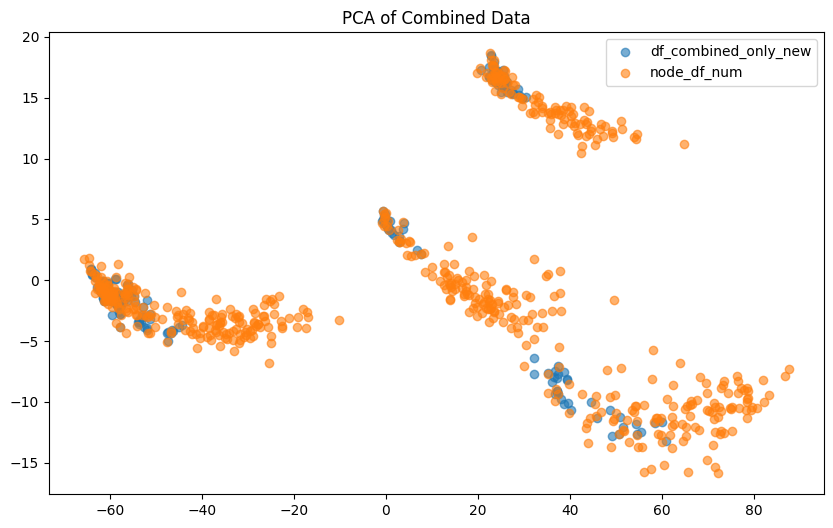

In [47]:
#important slide

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Combine both datasets for PCA

combined_data = np.vstack([df_combined_only_new.iloc[:, :-2].values, node_df_num.iloc[:, :-1].values])  # Exclude target and synthetic columns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plot the PCA results
plt.figure(figsize=(10, 6))

plt.scatter(pca_result[:df_combined_only_new.shape[0], 0], pca_result[:df_combined_only_new.shape[0], 1], label="df_combined_only_new", alpha=0.6)
plt.scatter(pca_result[df_combined_only_new.shape[0]:, 0], pca_result[df_combined_only_new.shape[0]:, 1], label="node_df_num", alpha=0.6)
plt.legend()
plt.title("PCA of Combined Data")
plt.show()


In [48]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load the edge list dataframe
def load_edge_list(edge_list_df):
    edge_index = edge_list_df[['Node1', 'Node2']].values.T
    edge_weight = edge_list_df['EdgeWeight'].values
    
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    return edge_index, edge_weight

# Load the node features dataframe
def load_node_features(node_features_df):
    features = node_features_df.drop(columns=['Target']).values
    labels = node_features_df['Target'].values
    
    node_features = torch.tensor(features, dtype=torch.float)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return node_features, labels

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Load edge list and node features (replace with actual DataFrames)
edge_index, edge_weight = load_edge_list(edge_df_num)
node_features, labels = load_node_features(node_df_num)

# Ensure that node indices in edge_index are within the range of available nodes
max_node_idx = node_features.shape[0] - 1
edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# Split the data into training and testing sets (80-20 split)
train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)

# Function to filter edges based on the available nodes in train/test sets
def filter_edges(edge_index, edge_weight, node_indices):
    mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
    filtered_edge_index = edge_index[:, mask]
    filtered_edge_weight = edge_weight[mask]
    return filtered_edge_index, filtered_edge_weight

# Filter edges for the training and testing sets
train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices))
test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# Create new node mappings for train and test sets
def create_node_mapping(indices):
    return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

train_node_mapping = create_node_mapping(train_indices)
test_node_mapping = create_node_mapping(test_indices)

# Remap edge indices
def remap_edges(edge_index, node_mapping):
    return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
                         [node_mapping[idx.item()] for idx in edge_index[1]]])

train_edge_index = remap_edges(train_edge_index, train_node_mapping)
test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# Create Data objects for training and testing sets
train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# Initialize the model, optimizer, and loss function
num_node_features = node_features.shape[1]
hidden_channels = 16
num_classes = len(torch.unique(labels))

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Training function
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)
        pred = out.argmax(dim=1)
        correct = (pred == data.y).sum()
        acc = int(correct) / len(data.y)
    return acc

# Train the model
epochs = 100
for epoch in range(epochs):
    loss = train(train_data)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Test the model
test_acc = test(test_data)
print(f'Test Accuracy: {test_acc:.4f}')

Epoch 0, Loss: 2.3745
Epoch 10, Loss: 0.9061
Epoch 20, Loss: 0.9127
Epoch 30, Loss: 0.5626
Epoch 40, Loss: 0.4520
Epoch 50, Loss: 0.3816
Epoch 60, Loss: 0.3709
Epoch 70, Loss: 0.3496
Epoch 80, Loss: 0.3414
Epoch 90, Loss: 0.3332
Test Accuracy: 0.8158


In [50]:
df_combined

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,Target,synthetic
566,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,0,1.0
567,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,0,1.0
568,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,0,1.0
569,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,0,1.0
570,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,-0.657129,0.099364,-0.116224,0.176402,-0.207899,-0.884134,-0.061586,-0.127194,0.065256,0.052619,...,-0.080057,-0.880944,-0.209037,-0.319855,0.005514,-0.583522,0.838863,-0.210392,0,1.0
1354,5.932122,7.852270,9.470857,5.153713,8.349710,8.961461,2.668439,8.888399,6.681888,3.600190,...,6.563484,11.145562,2.292997,5.184600,3.193596,8.828358,9.291252,10.788979,0,1.0
1355,-0.299560,-0.470108,-1.281127,-0.805651,-0.856807,-1.265904,-0.243917,-1.768716,-1.465685,-1.059621,...,-0.992575,0.444531,-1.371435,-1.010328,0.274867,-0.704447,-1.446333,-3.232174,0,1.0
1356,5.421532,6.967965,7.731045,6.001240,6.182203,6.175889,2.514053,8.092125,6.415887,3.039672,...,4.635829,11.543191,2.397915,5.952413,3.192436,7.319191,8.561234,9.463310,0,1.0


In [52]:
df_synthetic = df_combined.drop(["synthetic"] , axis = 1)

In [53]:
df_synthetic

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
566,3.509116,5.433348,5.374864,4.015619,2.836317,2.437904,4.466496,4.356067,2.393320,2.526803,...,2.594217,2.320346,2.462247,2.312812,2.818044,2.312812,4.429082,3.471027,3.773734,0
567,2.857707,6.520997,4.956027,4.795047,2.444765,3.212331,5.137576,5.841830,2.393320,4.804020,...,2.957259,2.320346,3.380289,3.095385,3.205068,2.312812,6.579985,3.922878,2.992261,0
568,4.026319,6.352979,5.833464,7.585631,5.998100,5.145297,4.918401,8.338741,6.332570,4.442822,...,5.115518,3.022024,3.380289,5.912401,3.982275,2.312812,8.447039,7.242045,10.160958,0
569,3.507234,5.985797,5.911117,4.515514,2.729146,2.385296,4.338608,2.834343,2.397839,3.751463,...,2.710199,2.320346,3.380289,2.986733,2.817278,2.312812,6.390195,3.471027,2.992261,0
570,3.468900,4.366865,4.524682,4.795047,2.392766,2.390673,4.338608,4.309712,2.408134,2.750908,...,2.594217,2.312812,2.534838,2.312812,2.817278,2.312812,5.177855,3.471027,3.967911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,-0.657129,0.099364,-0.116224,0.176402,-0.207899,-0.884134,-0.061586,-0.127194,0.065256,0.052619,...,0.509969,-0.080057,-0.880944,-0.209037,-0.319855,0.005514,-0.583522,0.838863,-0.210392,0
1354,5.932122,7.852270,9.470857,5.153713,8.349710,8.961461,2.668439,8.888399,6.681888,3.600190,...,4.540796,6.563484,11.145562,2.292997,5.184600,3.193596,8.828358,9.291252,10.788979,0
1355,-0.299560,-0.470108,-1.281127,-0.805651,-0.856807,-1.265904,-0.243917,-1.768716,-1.465685,-1.059621,...,-1.147874,-0.992575,0.444531,-1.371435,-1.010328,0.274867,-0.704447,-1.446333,-3.232174,0
1356,5.421532,6.967965,7.731045,6.001240,6.182203,6.175889,2.514053,8.092125,6.415887,3.039672,...,2.768166,4.635829,11.543191,2.397915,5.952413,3.192436,7.319191,8.561234,9.463310,0


Epoch 0, Loss: 3.5482, Test Accuracy: 0.2982
Epoch 10, Loss: 0.7175, Test Accuracy: 0.7456
Epoch 20, Loss: 0.9202, Test Accuracy: 0.7632
Epoch 30, Loss: 0.4421, Test Accuracy: 0.6404
Epoch 40, Loss: 0.4131, Test Accuracy: 0.7632
Epoch 50, Loss: 0.3820, Test Accuracy: 0.8421
Epoch 60, Loss: 0.3494, Test Accuracy: 0.8333
Epoch 70, Loss: 0.3362, Test Accuracy: 0.8333
Epoch 80, Loss: 0.3285, Test Accuracy: 0.8333
Epoch 90, Loss: 0.3200, Test Accuracy: 0.8333
Epoch 100, Loss: 0.3128, Test Accuracy: 0.8333
Epoch 110, Loss: 0.3081, Test Accuracy: 0.8333
Epoch 120, Loss: 0.3030, Test Accuracy: 0.8333
Epoch 130, Loss: 0.2990, Test Accuracy: 0.8333
Epoch 140, Loss: 0.2955, Test Accuracy: 0.8421
Epoch 150, Loss: 0.2917, Test Accuracy: 0.8421
Epoch 160, Loss: 0.2882, Test Accuracy: 0.8421
Epoch 170, Loss: 0.2850, Test Accuracy: 0.8333
Epoch 180, Loss: 0.2832, Test Accuracy: 0.8421
Epoch 190, Loss: 0.2806, Test Accuracy: 0.8421


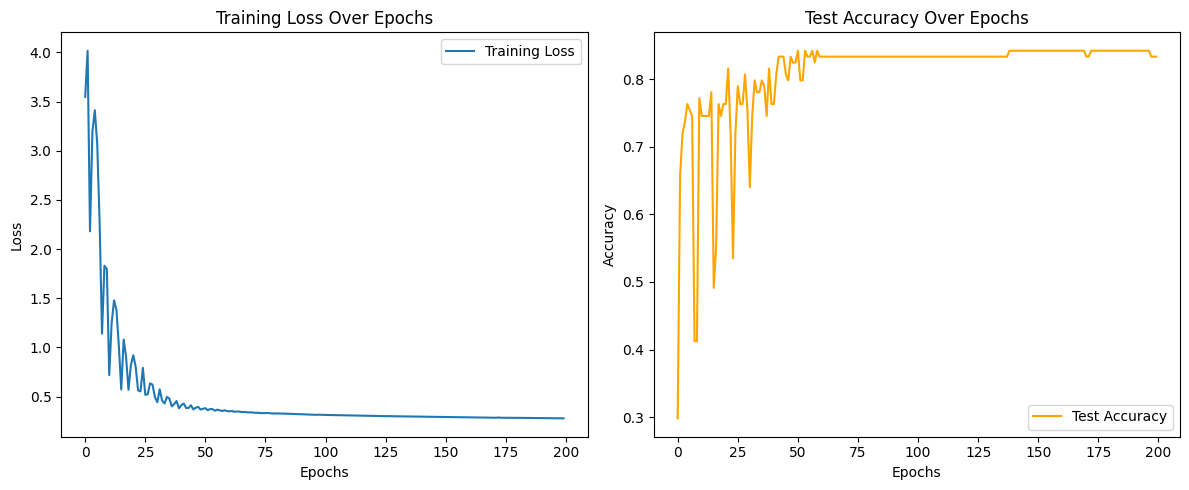

In [161]:

from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


SEED = 65

np.random.seed(SEED)
#torch.manual_seed(SEED)

# Load the edge list dataframe
def load_edge_list(edge_list_df):
    edge_index = edge_list_df[['Node1', 'Node2']].values.T
    edge_weight = edge_list_df['EdgeWeight'].values
    
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    return edge_index, edge_weight

# Load the node features dataframe
def load_node_features(node_features_df):
    features = node_features_df.drop(columns=['Target']).values
    labels = node_features_df['Target'].values
    
    node_features = torch.tensor(features, dtype=torch.float)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return node_features, labels

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Load edge list and node features (replace with actual DataFrames)
edge_index, edge_weight = load_edge_list(edge_df_num)
node_features, labels = load_node_features(node_df_num)

# Ensure that node indices in edge_index are within the range of available nodes
max_node_idx = node_features.shape[0] - 1
edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# Split the data into training and testing sets (80-20 split)
train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)

#train_indices = train_indices + list(range(len(node_df_num),len(df_combined)))

# Function to filter edges based on the available nodes in train/test sets
def filter_edges(edge_index, edge_weight, node_indices):
    mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
    filtered_edge_index = edge_index[:, mask]
    filtered_edge_weight = edge_weight[mask]
    return filtered_edge_index, filtered_edge_weight

# Filter edges for the training and testing sets
train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices))
test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# Create new node mappings for train and test sets
def create_node_mapping(indices):
    return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

train_node_mapping = create_node_mapping(train_indices)
test_node_mapping = create_node_mapping(test_indices)

# Remap edge indices
def remap_edges(edge_index, node_mapping):
    return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
                         [node_mapping[idx.item()] for idx in edge_index[1]]])

train_edge_index = remap_edges(train_edge_index, train_node_mapping)
test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# Create Data objects for training and testing sets
train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# Initialize the model, optimizer, and loss function
num_node_features = node_features.shape[1]
hidden_channels = 16
num_classes = len(torch.unique(labels))

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store loss and accuracy for plotting
losses = []
accuracies = []

# Training function
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
        pred = out.argmax(dim=1)
        correct = (pred == data.y).sum()
        acc = int(correct) / len(data.y)
    return acc
    
# Train the model
epochs = 200
for epoch in range(epochs):
    loss = train(train_data)
    acc = test(test_data)
    losses.append(loss)
    accuracies.append(acc)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss+
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 0, Loss: 4.8526, Test Accuracy: 0.3270
Epoch 10, Loss: 0.5586, Test Accuracy: 0.7862
Epoch 20, Loss: 0.4992, Test Accuracy: 0.7987
Epoch 30, Loss: 0.3840, Test Accuracy: 0.7987
Epoch 40, Loss: 0.3646, Test Accuracy: 0.8553
Epoch 50, Loss: 0.3326, Test Accuracy: 0.8616
Epoch 60, Loss: 0.3203, Test Accuracy: 0.8805
Epoch 70, Loss: 0.3089, Test Accuracy: 0.8805
Epoch 80, Loss: 0.2999, Test Accuracy: 0.8868
Epoch 90, Loss: 0.2921, Test Accuracy: 0.8868
Epoch 100, Loss: 0.2851, Test Accuracy: 0.8931
Epoch 110, Loss: 0.2789, Test Accuracy: 0.8931
Epoch 120, Loss: 0.2734, Test Accuracy: 0.8931
Epoch 130, Loss: 0.2686, Test Accuracy: 0.8931
Epoch 140, Loss: 0.2641, Test Accuracy: 0.8931
Epoch 150, Loss: 0.2599, Test Accuracy: 0.8931
Epoch 160, Loss: 0.2559, Test Accuracy: 0.8931
Epoch 170, Loss: 0.2521, Test Accuracy: 0.8931
Epoch 180, Loss: 0.2484, Test Accuracy: 0.8931
Epoch 190, Loss: 0.2447, Test Accuracy: 0.8931


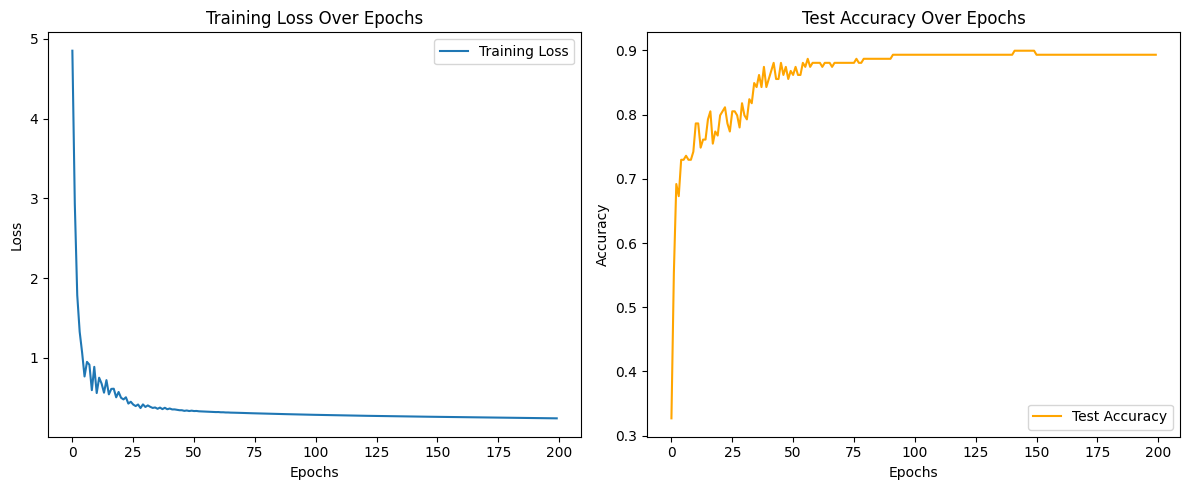

In [162]:

from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
import torch.nn.functional as F



np.random.seed(SEED)
torch.manual_seed(SEED)

# Load the edge list dataframe
def load_edge_list(edge_list_df):
    edge_index = edge_list_df[['Node1', 'Node2']].values.T
    edge_weight = edge_list_df['EdgeWeight'].values
    
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    return edge_index, edge_weight

# Load the node features dataframe
def load_node_features(node_features_df):
    features = node_features_df.drop(columns=['Target','synthetic']).values
    labels = node_features_df['Target'].values
    
    node_features = torch.tensor(features, dtype=torch.float)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return node_features, labels

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Load edge list and node features (replace with actual DataFrames)
edge_index, edge_weight = load_edge_list(edge_df_num)
node_features, labels = load_node_features(df_combined)

# Ensure that node indices in edge_index are within the range of available nodes
max_node_idx = node_features.shape[0] - 1
edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# Split the data into training and testing sets (80-20 split)
train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)


# Function to filter edges based on the available nodes in train/test sets
def filter_edges(edge_index, edge_weight, node_indices):
    mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
    filtered_edge_index = edge_index[:, mask]
    filtered_edge_weight = edge_weight[mask]
    return filtered_edge_index, filtered_edge_weight

# Filter edges for the training and testing sets
train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices))
test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# Create new node mappings for train and test sets
def create_node_mapping(indices):
    return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

train_node_mapping = create_node_mapping(train_indices)
test_node_mapping = create_node_mapping(test_indices)

# Remap edge indices
def remap_edges(edge_index, node_mapping):
    return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
                         [node_mapping[idx.item()] for idx in edge_index[1]]])

train_edge_index = remap_edges(train_edge_index, train_node_mapping)
test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# Create Data objects for training and testing sets
train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# Initialize the model, optimizer, and loss function
num_node_features = node_features.shape[1]
hidden_channels = 16
num_classes = len(torch.unique(labels))

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store loss and accuracy for plotting
losses = []
accuracies = []

# Training function
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
        pred = out.argmax(dim=1)
        correct = (pred == data.y).sum()
        acc = int(correct) / len(data.y)
    return acc
    
# Train the model
epochs = 200
for epoch in range(epochs):
    loss = train(train_data)
    acc = test(test_data)
    losses.append(loss)
    accuracies.append(acc)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss+
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
import numpy as np

def permutation_importance(model, data, baseline_acc):
    # Store feature importances
    importances = np.zeros(data.x.shape[1])

    # Iterate over each feature
    for i in range(data.x.shape[1]):
        x_copy = data.x.clone()  # Clone to avoid modifying original data

        # Permute feature i
        permuted_indices = torch.randperm(x_copy.size(0))
        x_copy[:, i] = x_copy[permuted_indices, i]

        # Forward pass with permuted feature
        out = model(x_copy, data.edge_index, data.edge_attr)
        pred = out.argmax(dim=1)

        # Calculate accuracy and importance
        permuted_acc = accuracy_score(data.y.cpu(), pred.cpu())
        importances[i] = baseline_acc - permuted_acc

    # Rank features by importance
    important_genes = [(i, imp) for i, imp in enumerate(importances) if imp > 0]
    important_genes.sort(key=lambda x: x[1], reverse=True)
    return important_genes

# Baseline accuracy
model.eval()
with torch.no_grad():
    baseline_out = model(train_data.x, train_data.edge_index, train_data.edge_attr)
    baseline_pred = baseline_out.argmax(dim=1)
    baseline_acc = accuracy_score(train_data.y.cpu(), baseline_pred.cpu())

# Calculate permutation importance
important_genes = permutation_importance(model, train_data, baseline_acc)

# Output top genes
print("Top Important Genes based on Permutation Importance:")
for idx, importance in important_genes:
    if(importance > 0.01):
        print(f"Gene {idx}: {importance:.4f}")


Top Important Genes based on Permutation Importance:
Gene 121: 0.1881
Gene 126: 0.1814
Gene 30: 0.0819
Gene 37: 0.0819
Gene 83: 0.0730
Gene 64: 0.0686
Gene 7: 0.0664
Gene 98: 0.0531
Gene 148: 0.0531
Gene 15: 0.0509
Gene 2: 0.0465
Gene 47: 0.0442
Gene 140: 0.0420
Gene 25: 0.0376
Gene 104: 0.0332
Gene 158: 0.0332
Gene 91: 0.0310
Gene 95: 0.0288
Gene 166: 0.0288
Gene 4: 0.0265
Gene 87: 0.0265
Gene 118: 0.0265
Gene 109: 0.0221
Gene 110: 0.0221
Gene 120: 0.0221
Gene 152: 0.0221
Gene 154: 0.0221
Gene 157: 0.0221
Gene 43: 0.0199
Gene 70: 0.0199
Gene 21: 0.0177
Gene 27: 0.0177
Gene 46: 0.0177
Gene 65: 0.0177
Gene 138: 0.0177
Gene 26: 0.0155
Gene 31: 0.0155
Gene 36: 0.0155
Gene 58: 0.0155
Gene 97: 0.0155
Gene 130: 0.0155
Gene 12: 0.0133
Gene 22: 0.0133
Gene 49: 0.0133
Gene 76: 0.0133
Gene 96: 0.0133
Gene 116: 0.0133
Gene 137: 0.0133
Gene 149: 0.0133
Gene 160: 0.0133
Gene 34: 0.0111
Gene 52: 0.0111
Gene 59: 0.0111
Gene 69: 0.0111
Gene 89: 0.0111
Gene 90: 0.0111
Gene 100: 0.0111
Gene 155: 0.0111


In [108]:
for idx, importance in important_genes:
    if(importance > 0.01):
        print(df_metadata[df_metadata["ID"]==gene_mapper_dict[idx]]["Gene Symbol"].iloc[0])
    

MASTL
ESPL1
CCNF
KNSTRN
SHCBP1
UHRF1
FANCI
SPC24
KIF2C
PKMYT1
STIL
NEK2
HMMR
MCM3
SPDL1
KIF18A
CEP55
DTL
CDCA7
CDC7
TICRR
MCM7
MELK
MCM6
CCNE2
CKAP5
EXO1
ASPM
CDCA2
NCAPG
PARPBP
TOP2A
TROAP
TPX2
OIP5
KPNA2
DEPDC1B
MTFR2
PTTG2
RRM1
ZWILCH
HJURP
FBXO5
PRC1
INCENP
CDC6
RFC3
AURKC
CENPM
FAM83D
CDC20B
DSCC1
CDC25A
MND1
ATAD2
BRCA1
E2F8
ERCC6L


In [109]:
for idx, importance in important_genes:
    if(importance > 0.01):
        print(df_metadata[df_metadata["ID"]==gene_mapper_dict[idx]]["ID"].iloc[0])
        
    

228468_at
204817_at
204826_at
225300_at
219493_at
225655_at
213007_at
217183_at
209408_at
204267_x_at
205339_at
204641_at
207165_at
201555_at
221685_s_at
221258_s_at
218542_at
218585_s_at
224428_s_at
204510_at
230021_at
208795_s_at
204825_at
201930_at
205034_at
1555278_a_at
204603_at
219918_s_at
226661_at
218662_s_at
220060_s_at
201291_s_at
1568596_a_at
210052_s_at
213599_at
201088_at
226980_at
228069_at
214557_at
201476_s_at
218349_s_at
218726_at
218875_s_at
218009_s_at
219769_at
203967_at
204127_at
211107_s_at
218741_at
225687_at
1553655_at
216646_at
1555772_a_at
223700_at
218782_s_at
204531_s_at
219990_at
219650_at


Gene 16: 0.0774
Gene 158: 0.0575
Gene 26: 0.0553
Gene 68: 0.0553
Gene 33: 0.0487
Gene 126: 0.0487
Gene 106: 0.0465
Gene 157: 0.0442
Gene 60: 0.0420
Gene 37: 0.0398

In [110]:
from sklearn.metrics import accuracy_score
import numpy as np
import torch

def permutation_importance(model, data, baseline_acc):
    # Store feature importances
    importances = np.zeros(data.x.shape[1])

    # Iterate over each feature
    for i in range(data.x.shape[1]):
        x_copy = data.x.clone()  # Clone to avoid modifying original data

        # Permute feature i
        permuted_indices = torch.randperm(x_copy.size(0))
        x_copy[:, i] = x_copy[permuted_indices, i]

        # Forward pass with permuted feature
        out = model(x_copy, data.edge_index, data.edge_attr)
        pred = out.argmax(dim=1)

        # Calculate accuracy and importance
        permuted_acc = accuracy_score(data.y.cpu(), pred.cpu())
        importances[i] = baseline_acc - permuted_acc

    return importances

# Baseline accuracy
model.eval()
with torch.no_grad():
    baseline_out = model(train_data.x, train_data.edge_index, train_data.edge_attr)
    baseline_pred = baseline_out.argmax(dim=1)
    baseline_acc = accuracy_score(train_data.y.cpu(), baseline_pred.cpu())

# Run permutation importance 100 times and average the results
n_runs = 100
all_importances = np.zeros((n_runs, train_data.x.shape[1]))

for run in range(n_runs):
    importances = permutation_importance(model, train_data, baseline_acc)
    all_importances[run, :] = importances

# Average the importances
avg_importances = np.mean(all_importances, axis=0)

# Rank features by average importance
important_genes = [(i, avg_imp) for i, avg_imp in enumerate(avg_importances) if avg_imp > 0]
important_genes.sort(key=lambda x: x[1], reverse=True)

# Output top genes based on averaged permutation importance
print("Top Important Genes based on Averaged Permutation Importance:")
for idx, importance in important_genes:
    print(f"Gene {idx}: {importance:.4f}")


KeyboardInterrupt: 

In [98]:
for i in important_genes:
    if(i[0]==16):
        print(i)

In [448]:
# def compute_saliency(model, data):
#     data.x.requires_grad = True  # Enable gradients for input features
#     model.eval()
    
#     out = model(data.x, data.edge_index, data.edge_attr)
#     loss = F.cross_entropy(out, data.y)
#     loss.backward()  # Compute gradients

#     # Absolute gradients represent feature importance
#     saliency = data.x.grad.abs().mean(dim=0).cpu().numpy()
#     return saliency

# saliency_scores = compute_saliency(model, train_data)
# important_genes_saliency = sorted(enumerate(saliency_scores), key=lambda x: x[1], reverse=True)

# print("Top Important Genes based on Saliency Scores:")
# for idx, score in important_genes_saliency[:10]:  # Top 10 genes
#     print(f"Gene {idx}: {score:.4f}")


Top Important Genes based on Saliency Scores:
Gene 30: 0.0004
Gene 66: 0.0002
Gene 65: 0.0002
Gene 86: 0.0002
Gene 157: 0.0002
Gene 57: 0.0002
Gene 54: 0.0002
Gene 56: 0.0002
Gene 2: 0.0002
Gene 82: 0.0002


In [111]:
def feature_masking_importance(model, data, baseline_acc):
    importances = []

    for i in range(data.x.shape[1]):
        x_copy = data.x.clone()
        x_copy[:, i] = 0  

        out = model(x_copy, data.edge_index, data.edge_attr)
        pred = out.argmax(dim=1)
        masked_acc = accuracy_score(data.y.cpu(), pred.cpu())

    
        importances.append(baseline_acc - masked_acc)

    return np.array(importances)

masking_importances = feature_masking_importance(model, train_data, baseline_acc)
important_genes_masking = sorted(enumerate(masking_importances), key=lambda x: x[1], reverse=True)

print("Top Important Genes based on Feature Masking:")
for idx, importance in important_genes_masking[:]: 
    print(f"Gene {idx}: {importance:.4f}")


Top Important Genes based on Feature Masking:
Gene 64: 0.2456
Gene 95: 0.1925
Gene 27: 0.1814
Gene 157: 0.1770
Gene 115: 0.1748
Gene 11: 0.1571
Gene 47: 0.1571
Gene 109: 0.1549
Gene 92: 0.1305
Gene 166: 0.0841
Gene 15: 0.0575
Gene 123: 0.0575
Gene 91: 0.0509
Gene 121: 0.0487
Gene 164: 0.0465
Gene 126: 0.0442
Gene 51: 0.0398
Gene 118: 0.0376
Gene 98: 0.0332
Gene 30: 0.0310
Gene 22: 0.0288
Gene 138: 0.0288
Gene 96: 0.0265
Gene 25: 0.0243
Gene 65: 0.0243
Gene 148: 0.0243
Gene 87: 0.0221
Gene 116: 0.0221
Gene 16: 0.0199
Gene 133: 0.0199
Gene 154: 0.0199
Gene 37: 0.0155
Gene 137: 0.0155
Gene 162: 0.0155
Gene 7: 0.0133
Gene 23: 0.0133
Gene 48: 0.0133
Gene 156: 0.0133
Gene 158: 0.0133
Gene 2: 0.0111
Gene 20: 0.0111
Gene 57: 0.0111
Gene 69: 0.0111
Gene 103: 0.0111
Gene 142: 0.0111
Gene 46: 0.0088
Gene 56: 0.0088
Gene 60: 0.0088
Gene 106: 0.0088
Gene 108: 0.0088
Gene 139: 0.0088
Gene 147: 0.0088
Gene 151: 0.0088
Gene 161: 0.0088
Gene 165: 0.0088
Gene 0: 0.0066
Gene 10: 0.0066
Gene 21: 0.0066
Ge

In [112]:
for i in important_genes_masking:
    if(i[0]==16):
        print(i)

(16, 0.019911504424778736)


In [118]:

df_metadata[df_metadata["ID"]=='218755_at']["Gene Symbol"].iloc[0]

'KIF20A'

In [120]:
imp_lst = []
for idx, importance in important_genes_masking:
    if(importance > 0.01):
        print(df_metadata[df_metadata["ID"]==gene_mapper_dict[idx]]["Gene Symbol"].iloc[0])
        imp_lst.append(idx)

UHRF1
DTL
TOP2A
ASPM
TACC3
KIFC1
NEK2
MELK
CCNB1
CDCA7
PKMYT1
CDC20
CEP55
MASTL
ORC6
ESPL1
UBE2T
MCM7
SPC24
CCNF
FBXO5
OIP5
CDC6
MCM3
TPX2
KIF2C
TICRR
RFC3
KIF20A
NCAPH
EXO1
KNSTRN
AURKC
TK1
FANCI
CDT1
MAD2L1
POLE2
KIF18A
STIL
NCAPG2
TYMS
MND1
CCNB2
HELLS


In [121]:
imp_lst

[64,
 95,
 27,
 157,
 115,
 11,
 47,
 109,
 92,
 166,
 15,
 123,
 91,
 121,
 164,
 126,
 51,
 118,
 98,
 30,
 22,
 138,
 96,
 25,
 65,
 148,
 87,
 116,
 16,
 133,
 154,
 37,
 137,
 162,
 7,
 23,
 48,
 156,
 158,
 2,
 20,
 57,
 69,
 103,
 142]

In [466]:
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
import torch

def multi_feature_masking_importance(model, data, baseline_acc, max_features=4):
    num_features = data.x.shape[1]
    importances = {}

    # Loop over groups of 1 to max_features
    for k in range(1, max_features + 1):
        print(f"Checking combinations of {k} features...")
        
        # Generate all combinations of k features
        for feature_indices in combinations(range(num_features), k):
            x_copy = data.x.clone()

            # Mask the selected features
            for idx in feature_indices:
                x_copy[:, idx] = 0

            # Forward pass with masked features
            out = model(x_copy, data.edge_index, data.edge_attr)
            pred = out.argmax(dim=1)
            masked_acc = accuracy_score(data.y.cpu(), pred.cpu())

            # Importance is the drop in accuracy
            importance = baseline_acc - masked_acc
            importances[feature_indices] = importance

    return importances

# Baseline accuracy
model.eval()
with torch.no_grad():
    baseline_out = model(train_data.x, train_data.edge_index, train_data.edge_attr)
    baseline_pred = baseline_out.argmax(dim=1)
    baseline_acc = accuracy_score(train_data.y.cpu(), baseline_pred.cpu())

# Run multi-feature masking importance
max_features_to_check = 4
multi_masking_importances = multi_feature_masking_importance(model, train_data, baseline_acc, max_features=max_features_to_check)

# Sort combinations by importance
sorted_importances = sorted(multi_masking_importances.items(), key=lambda x: x[1], reverse=True)

# Output results
print("Top Important Feature Combinations:")
for feature_indices, importance in sorted_importances[:10]:  # Top 10 combinations
    feature_names = ", ".join(f"Gene {idx}" for idx in feature_indices)
    print(f"Features: {feature_names} - Importance: {importance:.4f}")


Checking combinations of 1 features...
Checking combinations of 2 features...
Checking combinations of 3 features...
Checking combinations of 4 features...


KeyboardInterrupt: 

In [92]:
df_metadata[df_metadata["ID"]==gene_mapper_dict[82]]["Gene Symbol"].iloc[0]

'KNTC1'

In [48]:
gene_mapper_dict[9]

'204170_s_at'

In [52]:
val = 68
df_metadata[df_metadata["ID"]==gene_mapper_dict[val]]["Gene Symbol"].iloc[0]

'KNSTRN'

In [119]:
# Evaluate the effect of a group of genes on the output
def evaluate_gene_group_effect(model, data, gene_indices):
    """
    Evaluates the effect of a group of genes on the model's output.
    """
    model.eval()
    original_pred = model(data.x, data.edge_index, data.edge_attr).detach()
    
    # Perturb features of the specified genes
    perturbed_data = data.clone()
    perturbed_data.x[gene_indices] = 0  # Zero out features for selected genes
    
    perturbed_pred = model(perturbed_data.x, perturbed_data.edge_index, perturbed_data.edge_attr).detach()
    effect = torch.mean(torch.abs(original_pred - perturbed_pred), dim=0)  # Average prediction change
    return effect

# Example Usage
gene_indices = torch.tensor([3, 9, 0])  # Indices of genes to analyze
effect = evaluate_gene_group_effect(model, test_data, gene_indices)
print(f"Effect of gene group {gene_indices.tolist()}: {effect}")


Effect of gene group [3, 9, 0]: tensor([0.0405, 0.2456])


In [381]:
# Evaluate the effect of specific edges on the output
def evaluate_edge_effect(model, data, edge_indices):
    """
    Evaluates the effect of specific edges on the model output.
    """
    model.eval()
    original_pred = model(data.x, data.edge_index, data.edge_attr).detach()
    
    # Perturb edges by removing specified indices
    perturbed_data = data.clone()
    mask = torch.ones(perturbed_data.edge_index.size(1), dtype=torch.bool)
    mask[edge_indices] = False
    perturbed_data.edge_index = perturbed_data.edge_index[:, mask]
    perturbed_data.edge_attr = perturbed_data.edge_attr[mask]
    
    perturbed_pred = model(perturbed_data.x, perturbed_data.edge_index, perturbed_data.edge_attr).detach()
    effect = torch.mean(torch.abs(original_pred - perturbed_pred), dim=0)  # Average prediction change
    return effect

# Example Usage
edge_indices_to_remove = [0, 1]  # Indices of edges to evaluate
effect = evaluate_edge_effect(model, test_data, edge_indices_to_remove)
print(f"Effect of edges {edge_indices_to_remove}: {effect}")


Effect of edges [0, 1]: tensor([0.0081, 0.0068])


In [365]:
import torch

def permute_edges_and_measure_effect(model, data):
    """
    Permutes each edge in the graph and measures its effect on model predictions.

    Args:
    - model: Trained GNN model.
    - data: Graph data (PyG Data object).

    Returns:
    - effects: A sorted list of tuples (edge_index, effect_value), sorted by effect_value.
    """
    model.eval()
    original_pred = model(data.x, data.edge_index, data.edge_attr).detach()
    num_edges = data.edge_index.size(1)
    effects = []

    for edge_idx in range(num_edges):
        # Create a perturbed version of the graph by removing the edge
        perturbed_data = data.clone()
        mask = torch.ones(num_edges, dtype=torch.bool)
        mask[edge_idx] = False
        perturbed_data.edge_index = perturbed_data.edge_index[:, mask]
        perturbed_data.edge_attr = perturbed_data.edge_attr[mask]

        # Get model predictions on the perturbed graph
        perturbed_pred = model(perturbed_data.x, perturbed_data.edge_index, perturbed_data.edge_attr).detach()

        # Measure the effect of removing this edge
        effect = torch.mean(torch.abs(original_pred - perturbed_pred)).item()
        effects.append((edge_idx, effect))

    # Sort the effects in descending order of importance
    effects.sort(key=lambda x: x[1], reverse=True)
    return effects

# Example Usage
edge_effects = permute_edges_and_measure_effect(model, test_data)

# Print the top 10 edges with the highest effect
print("Top 10 edges with the highest effect:")
for edge_idx, effect in edge_effects[:10]:
    src, dst = test_data.edge_index[:, edge_idx]
    print(f"Edge ({df_metadata[df_metadata["ID"]==gene_mapper_dict[src.item()]]["Gene Symbol"].iloc[0]}, {df_metadata[df_metadata["ID"]==gene_mapper_dict[dst.item()]]["Gene Symbol"].iloc[0]}): Effect = {effect:.4f}")


AttributeError: 'list' object has no attribute 'x'

In [ ]:
val = 10
df_metadata[df_metadata["ID"]==gene_mapper_dict[val]]["Gene Symbol"].iloc[0]

#CKS1B and 

In [ ]:
node_df_num.iloc[0]

def get_predictions_vs_actuals(model, loader):
    model.eval()
    predictions = []
    actuals = []
    for data in loader:
        with torch.no_grad():
            out = model(data.x, data.edge_index, data.edge_attr, data.batch)
            pred = out.argmax(dim=1)
            predictions.extend(pred.cpu().numpy())  # Collect predictions
            actuals.extend(data.y.cpu().numpy())  # Collect actual labels
    return predictions, actuals

# Get the predictions and actuals from the test loader
predictions, actuals = get_predictions_vs_actuals(model, test_loader)

# Create a DataFrame to display the predictions vs actual values
prediction_vs_actual_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': actuals
})

print(prediction_vs_actual_df)


## Node_df_num , the actual data as the ml model

Epoch 0, Loss: 3.1338, Test Accuracy: 0.2895
Epoch 10, Loss: 0.5485, Test Accuracy: 0.7632
Epoch 20, Loss: 0.7043, Test Accuracy: 0.7456
Epoch 30, Loss: 0.4612, Test Accuracy: 0.7982
Epoch 40, Loss: 0.4404, Test Accuracy: 0.7895
Epoch 50, Loss: 0.4228, Test Accuracy: 0.7982
Epoch 60, Loss: 0.3991, Test Accuracy: 0.8070
Epoch 70, Loss: 0.3829, Test Accuracy: 0.8158
Epoch 80, Loss: 0.3706, Test Accuracy: 0.8158
Epoch 90, Loss: 0.3585, Test Accuracy: 0.8070


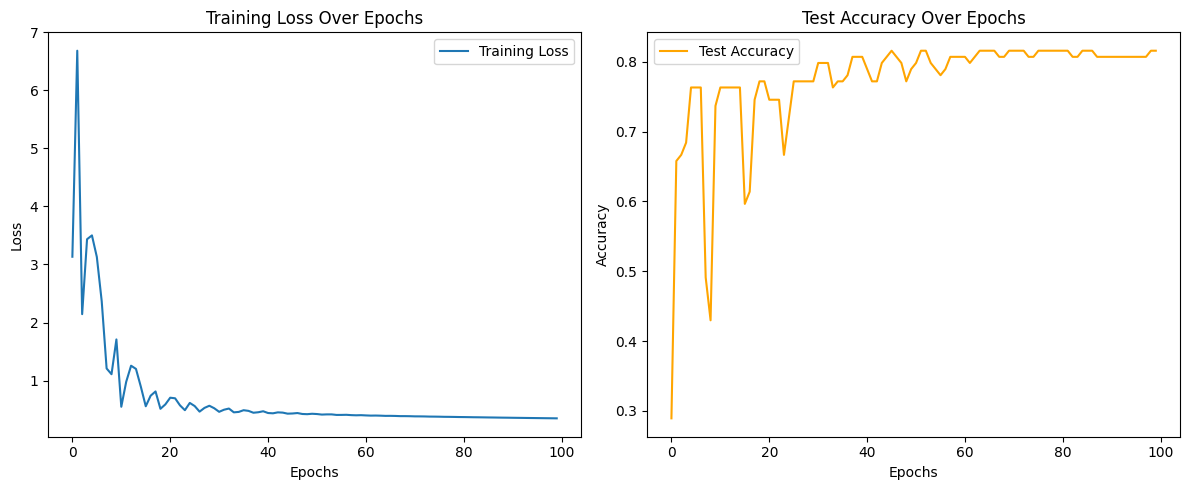

In [369]:
import pandas as pd
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Load the edge list dataframe
def load_edge_list(edge_list_df):
    edge_index = edge_list_df[['Node1', 'Node2']].values.T
    edge_weight = edge_list_df['EdgeWeight'].values
    
    edge_index = torch.tensor(edge_index, dtype=torch.long)
    edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
    return edge_index, edge_weight

# Load the node features dataframe
def load_node_features(node_features_df):
    features = node_features_df.drop(columns=['Target']).values
    labels = node_features_df['Target'].values
    
    node_features = torch.tensor(features, dtype=torch.float)
    labels = torch.tensor(labels, dtype=torch.long)
    
    return node_features, labels

# Define the GNN model
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        
    def forward(self, x, edge_index, edge_weight):
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_weight)
        return x

# Load edge list and node features (replace with actual DataFrames)
edge_index, edge_weight = load_edge_list(edge_df_num)
node_features, labels = load_node_features(node_df_num)

# Ensure that node indices in edge_index are within the range of available nodes
max_node_idx = node_features.shape[0] - 1
edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# Split the data into training and testing sets (80-20 split)
train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)

# Function to filter edges based on the available nodes in train/test sets
def filter_edges(edge_index, edge_weight, node_indices):
    mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
    filtered_edge_index = edge_index[:, mask]
    filtered_edge_weight = edge_weight[mask]
    return filtered_edge_index, filtered_edge_weight

# Filter edges for the training and testing sets
train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices))
test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# Create new node mappings for train and test sets
def create_node_mapping(indices):
    return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

train_node_mapping = create_node_mapping(train_indices)
test_node_mapping = create_node_mapping(test_indices)

# Remap edge indices
def remap_edges(edge_index, node_mapping):
    return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
                         [node_mapping[idx.item()] for idx in edge_index[1]]])

train_edge_index = remap_edges(train_edge_index, train_node_mapping)
test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# Create Data objects for training and testing sets
train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# Initialize the model, optimizer, and loss function
num_node_features = node_features.shape[1]
hidden_channels = 16
num_classes = len(torch.unique(labels))

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Lists to store loss and accuracy for plotting
losses = []
accuracies = []

# Training function
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Testing function
def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
        pred = out.argmax(dim=1)
        correct = (pred == data.y).sum()
        acc = int(correct) / len(data.y)
    return acc
    
# Train the mdel
epochs = 100
for epoch in range(epochs):
    loss = train(train_data)
    acc = test(test_data)
    losses.append(loss)
    accuracies.append(acc)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='orange')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [210]:
dc_new = dc_new.drop(["synthetic"] , axis = 1)

In [211]:
dc_new

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
1132,-0.736643,-0.449423,-0.429979,-0.120394,-0.135182,-0.401738,-1.463639,-2.911641,-0.485188,-1.108694,...,-0.827897,-0.930934,-1.273676,-0.415384,-1.065756,-1.387778,-1.958408,-0.974579,-1.618466,0
1133,6.675467,8.439291,4.890117,3.978907,3.286699,5.510406,8.903835,9.329389,7.779400,9.701602,...,5.299005,7.876823,3.555351,4.410740,6.045606,6.386385,4.103798,5.884471,5.187028,0
1134,-1.048630,-0.365816,-0.976560,0.462893,0.531476,-0.559032,-0.994173,-1.006971,-2.431127,0.181337,...,-0.530508,-1.492903,-0.672749,-1.839497,-2.839106,-0.156817,-1.450665,-0.924584,-2.197115,0
1135,-0.032612,-0.166691,-0.696998,0.113824,-0.282840,-0.302117,-0.339903,-1.109210,-0.007982,0.057699,...,-1.086224,-0.881117,-1.115886,-0.016348,-0.644827,-0.435122,-1.137023,-0.700429,-1.107512,0
1136,-0.051636,-0.737860,-0.307398,-0.224029,-0.155030,-0.398628,-0.642832,0.664694,-0.242933,0.151688,...,0.184140,-0.130725,0.287242,-0.212095,-0.896643,1.085472,-0.240733,0.020071,0.938978,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,-1.026708,-0.537884,-0.892589,-0.130619,0.017044,-0.093291,-1.332987,-2.313132,-0.941560,-1.451437,...,-1.168051,-0.886502,-0.804020,-0.080164,-0.955224,-1.907927,-1.757280,-1.000832,-1.871119,0
1354,-1.061595,-1.007609,-1.250226,0.151529,0.309775,-1.094656,-1.824262,-3.329824,-0.372685,-2.023636,...,-1.207784,-1.280745,-1.052762,-0.701330,-1.192772,-1.080991,-1.852954,-1.125113,-1.964110,0
1355,5.208775,5.492386,5.163780,2.312812,2.312812,5.047584,4.676567,2.956409,4.630529,6.367224,...,5.029634,4.849043,2.896605,3.421782,2.851627,2.312812,3.173216,2.317173,2.321312,0
1356,7.584295,5.808045,8.690434,3.406790,2.644854,5.077506,7.455559,6.043861,5.172194,9.852151,...,7.851694,7.680315,3.083110,3.459408,8.053489,6.246417,4.740749,4.682208,5.421391,0


In [212]:
node_df_num

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,5.022400,5.107245,4.933043,2.314435,2.315514,4.746749,3.969796,2.506760,4.603615,6.759863,...,4.304213,3.969127,3.322948,3.502249,2.988063,2.379764,3.182299,2.320346,2.312812,0
1,3.704602,5.780648,4.577702,2.444681,2.312812,3.879574,3.646817,5.978154,6.370231,8.761933,...,6.447967,4.107316,5.065801,3.311215,3.800681,3.756235,2.998083,2.320346,2.550378,0
2,6.707520,5.384486,6.650691,2.536779,2.312812,3.995614,7.507064,10.771374,7.483699,11.643447,...,7.057246,5.558188,4.753001,3.574230,5.331268,5.313360,3.970469,3.022024,5.659272,0
3,6.022019,5.719609,4.970873,2.584986,2.431217,4.710035,4.094045,3.424796,4.985642,7.482906,...,4.440190,3.938843,3.345718,3.412597,3.001012,3.028196,3.182299,2.320346,2.652008,0
4,4.637351,5.686936,4.533234,2.312812,2.312812,4.931836,4.094045,2.506760,4.884540,6.210368,...,4.988493,3.845241,3.420996,3.502249,2.681214,2.551017,3.052251,2.312812,2.312812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,-1.671900,-0.528600,-0.929800,-1.334100,-0.391900,-1.140600,-0.128900,-6.675200,-3.488600,-0.846400,...,-2.137500,-3.336900,-0.142800,-3.031400,-3.266600,0.475800,-0.583000,-2.746700,-0.829000,0
562,1.006500,1.281500,1.210500,1.805800,-1.178400,1.868200,3.305700,4.179200,1.939300,1.818800,...,3.287800,2.555700,1.860700,2.808800,4.170900,3.459600,3.604900,3.315200,4.156800,1
563,-0.184400,-0.178200,-1.269200,1.209300,-0.507100,-1.495100,-0.658900,-4.607300,-3.390000,-0.411300,...,-0.652700,-1.181800,-1.685200,-2.813000,-1.080900,-0.586000,-0.636000,-3.818900,-1.143700,0
564,0.154800,0.307100,-0.018700,0.673400,-0.079200,1.313500,1.969700,2.504900,1.298200,1.593200,...,1.801800,0.785700,-0.283600,0.935000,0.933100,0.608200,1.607200,1.129200,2.361200,1


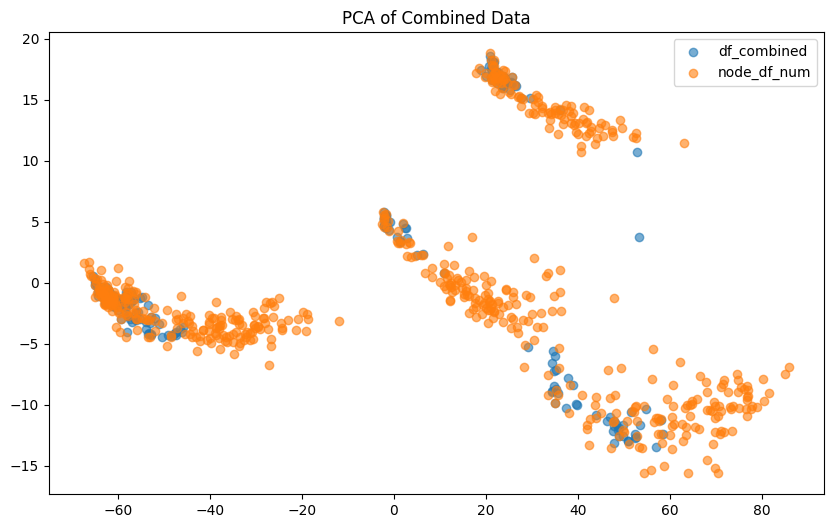

In [223]:
from sklearn.decomposition import PCA

# Combine both datasets for PCA
combined_data = np.vstack([dc_new.iloc[:, :-1].values, node_df_num.iloc[:, :-1].values])  # Exclude target and synthetic columns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:dc_new.shape[0], 0], pca_result[:dc_new.shape[0], 1], label="df_combined", alpha=0.6)
plt.scatter(pca_result[dc_new.shape[0]:, 0], pca_result[dc_new.shape[0]:, 1], label="node_df_num", alpha=0.6)
plt.legend()
plt.title("PCA of Combined Data")
plt.show()


### Smote data in the ml model

In [330]:
train_indices = train_indices + list(range(len(node_df_num),len(df_combined)))

In [ ]:
# import numpy as np
# import pandas as pd
# import torch
# from torch import nn, optim
# from torch.utils.data import DataLoader, TensorDataset

# # Assume node_df_num is your original DataFrame
# X = node_df_num.iloc[:, :-1].values  # Features
# y = node_df_num.iloc[:, -1].values   # Target

# # Normalize data for GAN training
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# # Convert data to PyTorch tensors
# X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
# y_tensor = torch.tensor(y, dtype=torch.float32)

# # Separate data by class
# class_data = {label: X_tensor[y_tensor == label] for label in np.unique(y)}

# # GAN Parameters
# latent_dim = 100
# input_dim = X_scaled.shape[1]
# epochs = 2000
# batch_size = 64
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# # Define Generator
# class Generator(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(Generator, self).__init__()
#         self.net = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Linear(128, 256),
#             nn.ReLU(),
#             nn.Linear(256, output_dim),
#             nn.Tanh()  # Assuming scaled data
#         )

#     def forward(self, z):
#         return self.net(z)

# # Define Discriminator
# class Discriminator(nn.Module):
#     def __init__(self, input_dim):
#         super(Discriminator, self).__init__()
#         self.net = nn.Sequential(
#             nn.Linear(input_dim, 256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 128),
#             nn.LeakyReLU(0.2),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.net(x)

# # Training GAN
# def train_gan(data, generator, discriminator, epochs, batch_size):
#     # Optimizers and loss
#     optim_gen = optim.Adam(generator.parameters(), lr=0.0002)
#     optim_disc = optim.Adam(discriminator.parameters(), lr=0.0002)
#     criterion = nn.BCELoss()

#     for epoch in range(epochs):
#         for real_data in DataLoader(data, batch_size=batch_size, shuffle=True):
#             # Real Data
#             real_data = real_data.to(device)
#             batch_size = real_data.size(0)
#             real_labels = torch.ones(batch_size, 1, device=device)
#             fake_labels = torch.zeros(batch_size, 1, device=device)

#             # Train Discriminator
#             noise = torch.randn(batch_size, latent_dim, device=device)
#             fake_data = generator(noise)
#             real_pred = discriminator(real_data)
#             fake_pred = discriminator(fake_data.detach())
#             loss_disc = criterion(real_pred, real_labels) + criterion(fake_pred, fake_labels)
#             optim_disc.zero_grad()
#             loss_disc.backward()
#             optim_disc.step()

#             # Train Generator
#             noise = torch.randn(batch_size, latent_dim, device=device)
#             fake_data = generator(noise)
#             fake_pred = discriminator(fake_data)
#             loss_gen = criterion(fake_pred, real_labels)
#             optim_gen.zero_grad()
#             loss_gen.backward()
#             optim_gen.step()

#         if (epoch + 1) % 100 == 0:
#             print(f"Epoch {epoch+1}/{epochs}, Loss D: {loss_disc.item()}, Loss G: {loss_gen.item()}")

# # Generate synthetic data
# def generate_samples(generator, num_samples):
#     noise = torch.randn(num_samples, latent_dim, device=device)
#     synthetic_data = generator(noise)
#     return synthetic_data.cpu().detach().numpy()

# # Train a GAN for each class
# synthetic_data = []
# for label, data in class_data.items():
#     generator = Generator(latent_dim, input_dim).to(device)
#     discriminator = Discriminator(input_dim).to(device)
#     train_gan(data, generator, discriminator, epochs, batch_size)
#     synthetic_samples = generate_samples(generator, len(data))  # Generate synthetic samples
#     synthetic_labels = np.full((synthetic_samples.shape[0],), label)  # Assign the same label
#     synthetic_data.append((synthetic_samples, synthetic_labels))

# # Combine original and synthetic data
# synthetic_data_s = np.vstack([s[0] for s in synthetic_data])
# synthetic_labels = np.concatenate([s[1] for s in synthetic_data])

# X_combined = np.vstack([X_scaled, synthetic_data_s])
# y_combined = np.concatenate([y, synthetic_labels])

# # Add synthetic indicator
# synthetic_indicator = np.concatenate([np.zeros(X_scaled.shape[0]), np.ones(synthetic_data_s.shape[0])])

# # Create a DataFrame
# df_combined_new = pd.DataFrame(scaler.inverse_transform(X_combined), columns=node_df_num.columns[:-1])
# df_combined_new['Target'] = y_combined
# df_combined_new['synthetic'] = synthetic_indicator

# print(df_combined_new.head())


Epoch 100/2000, Loss D: 1.6032978296279907, Loss G: 0.9659982919692993
Epoch 200/2000, Loss D: 1.3190423250198364, Loss G: 0.8675349950790405
Epoch 300/2000, Loss D: 1.3147568702697754, Loss G: 1.498045802116394
Epoch 400/2000, Loss D: 1.6760046482086182, Loss G: 0.8967448472976685
Epoch 500/2000, Loss D: 1.1874462366104126, Loss G: 0.7604029774665833


In [350]:
# dc_new = df_combined_new.drop("synthetic",axis=1)

In [332]:
# df_c_new = df_combined_new.drop("synthetic" , axis = 1)

### GAN datain the ml model

In [469]:
# train_indices = train_indices + list(range(len(df_combined),len(df_c_new)))

In [471]:
# import pandas as pd
# import torch
# from torch_geometric.data import Data
# from sklearn.model_selection import train_test_split
# from torch_geometric.nn import GCNConv
# import torch.nn.functional as F
# import matplotlib.pyplot as plt

# # Load the edge list dataframe
# def load_edge_list(edge_list_df):
#     edge_index = edge_list_df[['Node1', 'Node2']].values.T
#     edge_weight = edge_list_df['EdgeWeight'].values
    
#     edge_index = torch.tensor(edge_index, dtype=torch.long)
#     edge_weight = torch.tensor(edge_weight, dtype=torch.float)
    
#     return edge_index, edge_weight

# # Load the node features dataframe
# def load_node_features(node_features_df):
#     features = node_features_df.drop(columns=['Target']).values
#     labels = node_features_df['Target'].values
    
#     node_features = torch.tensor(features, dtype=torch.float)
#     labels = torch.tensor(labels, dtype=torch.long)
    
#     return node_features, labels

# # Define the GNN model
# class GCN(torch.nn.Module):
#     def __init__(self, num_node_features, hidden_channels, num_classes):
#         super(GCN, self).__init__()
#         self.conv1 = GCNConv(num_node_features, hidden_channels)
#         self.conv2 = GCNConv(hidden_channels, num_classes)
        
#     def forward(self, x, edge_index, edge_weight):
#         x = self.conv1(x, edge_index, edge_weight)
#         x = F.relu(x)
#         x = self.conv2(x, edge_index, edge_weight)
#         return x

# # Load edge list and node features (replace with actual DataFrames)
# edge_index, edge_weight = load_edge_list(edge_df_num)
# node_features, labels = load_node_features(df_c_new)

# # Ensure that node indices in edge_index are within the range of available nodes
# max_node_idx = node_features.shape[0] - 1
# edge_index = edge_index[:, (edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]
# edge_weight = edge_weight[(edge_index[0] <= max_node_idx) & (edge_index[1] <= max_node_idx)]

# # Split the data into training and testing sets (80-20 split)
# train_indices, test_indices = train_test_split(range(node_features.shape[0]), test_size=0.2, random_state=42)

# #train_indices = train_indices + list(range(len(node_df_num),len(df_combined)))

# # Function to filter edges based on the available nodes in train/test sets
# def filter_edges(edge_index, edge_weight, node_indices):
#     mask = torch.isin(edge_index[0], node_indices) & torch.isin(edge_index[1], node_indices)
#     filtered_edge_index = edge_index[:, mask]
#     filtered_edge_weight = edge_weight[mask]
#     return filtered_edge_index, filtered_edge_weight

# # Filter edges for the training and testing sets
# train_edge_index, train_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(train_indices_n))
# test_edge_index, test_edge_weight = filter_edges(edge_index, edge_weight, torch.tensor(test_indices))

# # Create new node mappings for train and test sets
# def create_node_mapping(indices):
#     return {old_idx: new_idx for new_idx, old_idx in enumerate(indices)}

# train_node_mapping = create_node_mapping(train_indices)
# test_node_mapping = create_node_mapping(test_indices)

# # Remap edge indices
# def remap_edges(edge_index, node_mapping):
#     return torch.tensor([[node_mapping[idx.item()] for idx in edge_index[0]],
#                          [node_mapping[idx.item()] for idx in edge_index[1]]])

# train_edge_index = remap_edges(train_edge_index, train_node_mapping)
# test_edge_index = remap_edges(test_edge_index, test_node_mapping)

# # Create Data objects for training and testing sets
# train_data = Data(x=node_features[train_indices], edge_index=train_edge_index, edge_attr=train_edge_weight, y=labels[train_indices])
# test_data = Data(x=node_features[test_indices], edge_index=test_edge_index, edge_attr=test_edge_weight, y=labels[test_indices])

# # Initialize the model, optimizer, and loss function
# num_node_features = node_features.shape[1]
# hidden_channels = 16
# num_classes = len(torch.unique(labels))

# model = GCN(num_node_features, hidden_channels, num_classes)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# criterion = torch.nn.CrossEntropyLoss()

# # Lists to store loss and accuracy for plotting
# losses = []
# accuracies = []

# # Training function
# def train(data):
#     model.train()
#     optimizer.zero_grad()
#     out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
#     loss = criterion(out, data.y)
#     loss.backward()
#     optimizer.step()
#     return loss.item()

# # Testing function
# def test(data):
#     model.eval()
#     with torch.no_grad():
#         out = model(data.x, data.edge_index, data.edge_attr)  # Pass edge_index and edge_attr as arguments
#         pred = out.argmax(dim=1)
#         correct = (pred == data.y).sum()
#         acc = int(correct) / len(data.y)
#     return acc
    
# # Train the model
# epochs = 100
# for epoch in range(epochs):
#     loss = train(train_data)
#     acc = test(test_data)
#     losses.append(loss)
#     accuracies.append(acc)
    
#     if epoch % 10 == 0:
#         print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# # Plotting loss and accuracy
# plt.figure(figsize=(12, 5))

# # Plot loss
# plt.subplot(1, 2, 1)
# plt.plot(losses, label='Training Loss')
# plt.title('Training Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plot accuracy
# plt.subplot(1, 2, 2)
# plt.plot(accuracies, label='Test Accuracy', color='orange')
# plt.title('Test Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()

KeyError: 23

In [457]:
# dc_new = df_combined_new.drop("synthetic" , axis = 1)

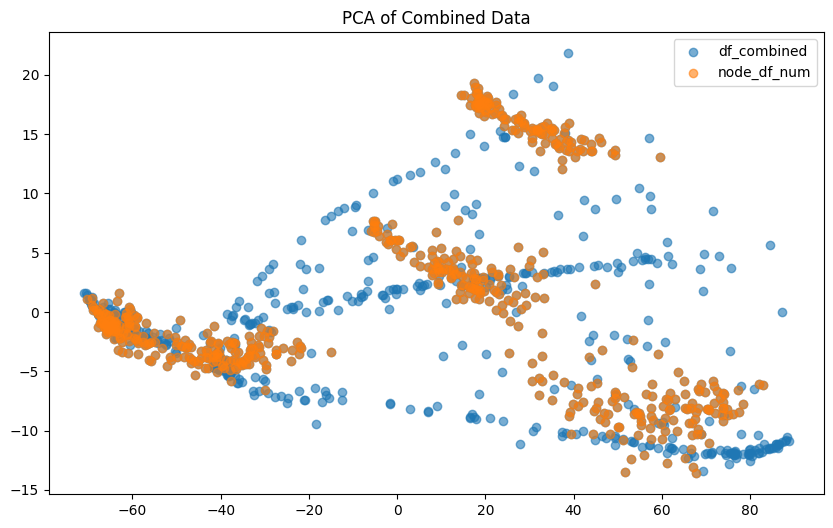

In [359]:
from sklearn.decomposition import PCA

# Combine both datasets for PCA
combined_data = np.vstack([dc_new.values,node_df_num.iloc[:, :-1].values])  # Exclude target and synthetic columns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_data)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:dc_new.shape[0], 0], pca_result[:dc_new.shape[0], 1], label="df_combined", alpha=0.6)
plt.scatter(pca_result[dc_new.shape[0]:, 0], pca_result[dc_new.shape[0]:, 1], label="node_df_num", alpha=0.6)
plt.legend()
plt.title("PCA of Combined Data")
plt.show()


In [354]:
dc_new

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,Target
0,5.022400,5.107245,4.933043,2.314435,2.315514,4.746749,3.969796,2.506760,4.603615,6.759863,...,4.304213,3.969127,3.322948,3.502249,2.988063,2.379764,3.182299,2.320346,2.312812,0
1,3.704602,5.780648,4.577702,2.444681,2.312812,3.879574,3.646817,5.978154,6.370231,8.761933,...,6.447967,4.107316,5.065801,3.311215,3.800681,3.756235,2.998083,2.320346,2.550378,0
2,6.707520,5.384486,6.650691,2.536779,2.312812,3.995614,7.507064,10.771374,7.483699,11.643447,...,7.057246,5.558188,4.753001,3.574230,5.331268,5.313360,3.970469,3.022024,5.659272,0
3,6.022019,5.719609,4.970873,2.584986,2.431217,4.710035,4.094045,3.424796,4.985642,7.482906,...,4.440190,3.938843,3.345718,3.412597,3.001012,3.028196,3.182299,2.320346,2.652008,0
4,4.637351,5.686936,4.533234,2.312812,2.312812,4.931836,4.094045,2.506760,4.884540,6.210368,...,4.988493,3.845241,3.420996,3.502249,2.681214,2.551017,3.052251,2.312812,2.312812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,4.424321,2.997661,4.601667,1.029977,1.264277,3.967446,5.437649,3.903738,3.607311,4.748436,...,3.719171,4.612956,2.804108,1.461521,4.594284,3.506066,3.399457,3.421903,4.594880,1
1128,7.327791,5.367473,6.636996,3.177575,2.943661,6.991501,8.450913,10.839592,8.319319,11.718591,...,6.147715,6.297648,5.735213,3.383564,5.581101,4.269001,5.511555,4.697103,5.903299,1
1129,5.402359,3.695939,4.950740,2.370577,2.322510,5.500093,5.785585,8.181728,6.191333,8.664351,...,3.869647,4.661261,4.169453,2.239585,4.013771,2.837108,3.777130,3.115253,3.874665,1
1130,1.653392,-0.440386,0.128099,-0.094270,0.169900,0.760700,0.601077,0.462764,0.079602,-0.900814,...,-0.049215,1.268613,1.555401,0.447515,1.224801,1.027897,0.554184,0.845022,1.746267,1
